<a href="https://colab.research.google.com/github/Jorge2018/prediccion_ventas/blob/main/Script_proyectoDOS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segunda Opcion
**fuente de datos=https://footystats.org**

**Descripcion= estadisticas de los partidos jugados de la liga de futbol inglesa de 1a division**

**Objetivo= determinar si un equipo es 'goleador' o no (goleador mas de 2 goles marcados por partido)**

**Problema del tipo clasificacion**

**Los retos a resolver son:normalizacion de caracteres "extraños" en los datos del tipo object, y la conversion a escalas de los datos del tipo number**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns 
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('https://raw.githubusercontent.com/Jorge2018/RepositorioArchivos/main/england-premier-league-matches-2018-to-2019-stats.csv')
df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


**Reduccion de cols**

In [2]:
df=df[['home_team_goal_count','home_team_goal_count_half_time','home_team_corner_count','home_team_yellow_cards','home_team_red_cards','home_team_shots',
       'home_team_shots_on_target','home_team_shots_off_target','home_team_fouls','home_team_possession']]
df

,home_team_goal_count,home_team_goal_count_half_time,home_team_corner_count,home_team_yellow_cards,home_team_red_cards,home_team_shots,home_team_shots_on_target,home_team_shots_off_target,home_team_fouls,home_team_possession
0,2,1,2,2,0,8,7,1,11,46
1,1,1,3,2,0,11,3,8,11,40
2,2,1,7,1,0,11,5,6,11,62
3,0,0,5,1,0,11,7,4,9,66
4,0,0,2,2,0,6,2,4,9,37
...,...,...,...,...,...,...,...,...,...,...
375,2,1,4,0,0,11,6,5,3,59
376,0,0,11,3,0,21,11,10,9,73
377,1,1,4,0,0,7,4,3,8,53
378,2,1,7,0,0,9,4,5,10,55


**Encuentren los nombres de clase y determinen cómo están las clases balanceadas**

In [3]:
df['home_team_goal_count'].value_counts(normalize = True)

1    0.305263
2    0.250000
0    0.231579
3    0.126316
4    0.057895
5    0.021053
6    0.007895
Name: home_team_goal_count, dtype: float64

**Se puede observar que el mayor porcentaje de partidos, termino con menos de 3  goles (entre 79 y 81 %), el % restante corresponde a partidos con equipos goleadores**

# Grafo h y dispersion, cuantificador de datos

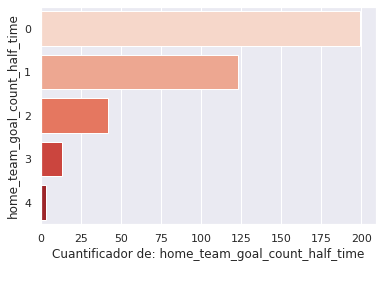

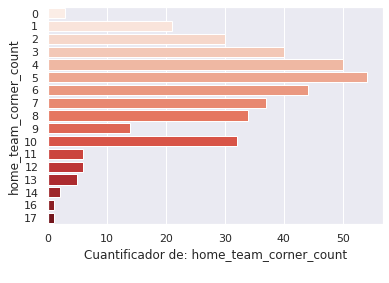

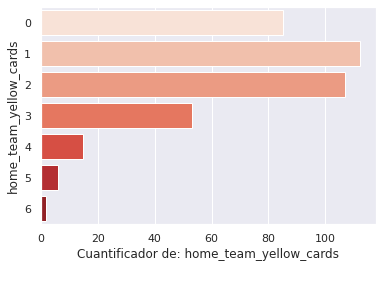

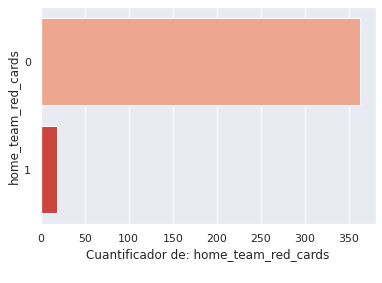

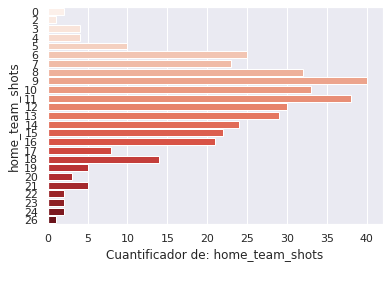

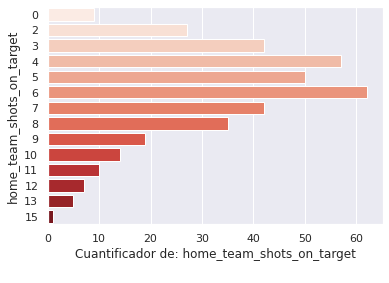

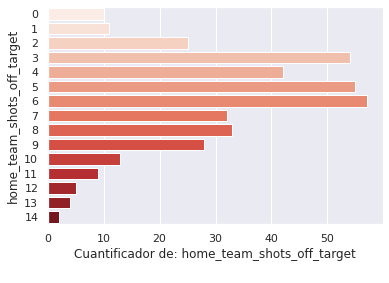

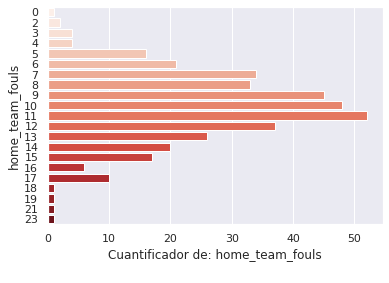

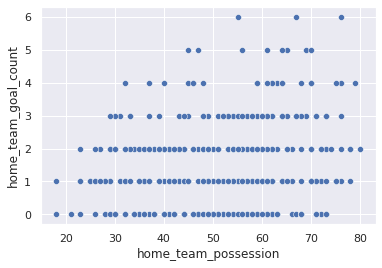

In [4]:
lista=['home_team_goal_count_half_time','home_team_corner_count','home_team_yellow_cards','home_team_red_cards','home_team_shots',
       'home_team_shots_on_target','home_team_shots_off_target','home_team_fouls']
for idx, column in enumerate(lista): 
    sns.set_theme(style="darkgrid")
    sns.countplot(y=column, data=df, palette="Reds")
    plt.ylabel(column)
    plt.xlabel(f'Cuantificador de: {column}\n')
    plt.show()
sns.set_theme(style="darkgrid")
sns.scatterplot(data=df, y="home_team_goal_count", x="home_team_possession")


**Se observa que la cantidad de goles del equipo local (0 y 1) de la muestra terminado el primer tiempo (o al descanso), abarca gran parte de esta**

**Se observa en la muestra, que el mayor porcentaje de corners que el equipo local tuvo a su favor, esta en el rango entre 2 y 8**

**Se observa en la muestra, que el mayor porcentaje de tarjetas amarillas que el equipo local recibio, esta en el rango de entre 0 y 3**

**Se observa en la muestra, que el equipo local en un gran procentaje no recibio tarjetas rojas**

**Se observa en la muestra, que el mayor porcentaje de disparos (shot) que el equipo local tuvo a su favor esta en el rango entre 5 y 18**

**Se observa en la muestra, que el mayor porcentaje de disparos al arco (shots target) que equipo local tuvo a su favor esta en el rango entre 2 y 8**

**Se observa en la muestra, que el mayor porcentaje de disparos fuera del arco (shots target off) que equipo local tuvo a su favor esta en el rango entre 2 y 9**

**Se observa en la muestra, que el mayor porcentaje de faltas (foul) que equipo local cometio esta en el rango entre 5 y 15**

**Se observa en la muestra, que los equipos goleadores, obtuvieron al menos un 25% de la tenencia de la pelota**

# Exploracion de Datos

In [5]:
df.duplicated()
df = df.drop_duplicates()
print('la cantidad de registros sin duplicados es:\n',df.count())
print('---------------------------')
print('los datos faltantes del df son:\n',df.isna().sum())
print('---------------------------')
print('los tipos de datos son:\n')
df.info()
print('---------------------------')
df.describe().round(3)

la cantidad de registros sin duplicados es:
 home_team_goal_count              380
home_team_goal_count_half_time    380
home_team_corner_count            380
home_team_yellow_cards            380
home_team_red_cards               380
home_team_shots                   380
home_team_shots_on_target         380
home_team_shots_off_target        380
home_team_fouls                   380
home_team_possession              380
dtype: int64
---------------------------
los datos faltantes del df son:
 home_team_goal_count              0
home_team_goal_count_half_time    0
home_team_corner_count            0
home_team_yellow_cards            0
home_team_red_cards               0
home_team_shots                   0
home_team_shots_on_target         0
home_team_shots_off_target        0
home_team_fouls                   0
home_team_possession              0
dtype: int64
---------------------------
los tipos de datos son:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 0 to 379
Dat

,home_team_goal_count,home_team_goal_count_half_time,home_team_corner_count,home_team_yellow_cards,home_team_red_cards,home_team_shots,home_team_shots_on_target,home_team_shots_off_target,home_team_fouls,home_team_possession
count,380.000,380.000,380.000,380.000,380.000,380.000,380.000,380.000,380.000,380.000
mean,1.568,0.679,5.726,1.545,0.047,11.332,5.761,5.571,10.161,51.147
std,1.313,0.861,3.026,1.229,0.213,4.278,2.716,2.826,3.288,13.838
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.000
25%,1.000,0.000,4.000,1.000,0.000,8.000,4.000,3.000,8.000,41.000
50%,1.000,0.000,5.000,1.000,0.000,11.000,6.000,5.000,10.000,51.000
75%,2.000,1.000,8.000,2.000,0.000,14.000,7.000,7.000,12.000,62.000
max,6.000,4.000,17.000,6.000,1.000,26.000,15.000,14.000,23.000,80.000


**Codificacion ordinal de la col home_team_goal_count**

In [6]:
df['home_team_goal_count'].replace({0:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:1}, inplace=True)
df['home_team_goal_count'].value_counts()

0    299
1     81
Name: home_team_goal_count, dtype: int64

# Separa valores X, y

In [7]:
y = df['home_team_goal_count']
X = df.drop(columns=['home_team_goal_count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Proceso para realizar transformaciones en los datos**

In [8]:
## **Instanciar selectores**
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

## Instanciar transformadores SimpleImputer, StandardScaler y OneHotEncoder
# Imputers
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

## **Instanciar el pipeline**
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

## **Asignacion de tupla e instanciacion de ColumnTransformer**
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

## **Transformacion de datos**
# fit on train
preprocessor.fit(X_train)
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Revision de resultados**

In [9]:
print(np.isnan(X_train_processed).sum().sum(), 'valores perdidos en la data de entrenamiento')
print(np.isnan(X_test_processed).sum().sum(), 'valores perdidos en la data de prueba')
print('\n')
print('Todos los datos procesados del X_train_processed son del tipo:', X_train_processed.dtype)
print('Todos los datos procesados del X_test_processed son del tipo', X_test_processed.dtype)
print('\n')
print('shape de los datos de entrenamiento son', X_train_processed.shape)
print('\n')
print('shape de los datos de test son', X_test_processed.shape)

0 valores perdidos en la data de entrenamiento
0 valores perdidos en la data de prueba


Todos los datos procesados del X_train_processed son del tipo: float64
Todos los datos procesados del X_test_processed son del tipo float64


shape de los datos de entrenamiento son (285, 9)


shape de los datos de test son (95, 9)


*Crea instancias de los modelos y Revision de los hiperparametros*

In [10]:
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=10)
print('DecisionTree\n',dec_tree.get_params())
print('_______________________________________________')
bagreg = BaggingClassifier(random_state = 0,n_estimators=10)
print('Bagging\n',bagreg.get_params())
print('_______________________________________________')
knn = KNeighborsClassifier(n_neighbors=200)
print('KNeighbors\n',knn.get_params())

DecisionTree
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}
_______________________________________________
Bagging
 {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
_______________________________________________
KNeighbors
 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 200, 'p': 2, 'weights': 'uniform'}


In [11]:
import time
import warnings
warnings.filterwarnings('ignore')


df_rev=pd.DataFrame()
start = time.time()
dec_tree.fit(X_train_processed, y_train)
dec_tree.predict(X_test_processed)

# calculen la exactitud de la clasificación
train_score = dec_tree.score(X_train_processed, y_train)
test_score= dec_tree.score(X_test_processed, y_test)
end = time.time()
t_proc=end-start
valor_ = pd.DataFrame({"accuracy_train":[train_score], "accuracy_test":[test_score],"time_proceso":[t_proc],"model":['DecisionTree']})
df_rev=df_rev.append(valor_)

start = time.time()
bagreg.fit(X_train_processed, y_train)
bagreg.predict(X_test_processed)

# calculen la exactitud de la clasificación
train_score = bagreg.score(X_train_processed, y_train)
test_score= bagreg.score(X_test_processed, y_test)
end = time.time()
t_proc=end-start
valor_ = pd.DataFrame({"accuracy_train":[train_score], "accuracy_test":[test_score],"time_proceso":[t_proc],"model":['Bagging']})
df_rev=df_rev.append(valor_)

start = time.time()
knn.fit(X_train_processed, y_train)
knn.predict(X_test_processed)

# calculen la exactitud de la clasificación
train_score = knn.score(X_train_processed, y_train)
test_score= knn.score(X_test_processed, y_test)
end = time.time()
t_proc=end-start
valor_ = pd.DataFrame({"accuracy_train":[train_score], "accuracy_test":[test_score],"time_proceso":[t_proc],"model":['KNeighbors']})
df_rev=df_rev.append(valor_)

In [12]:
df_rev

,accuracy_train,accuracy_test,time_proceso,model
0,0.996491,0.715789,0.003663,DecisionTree
0,0.985965,0.821053,0.026927,Bagging
0,0.796491,0.757895,0.056817,KNeighbors


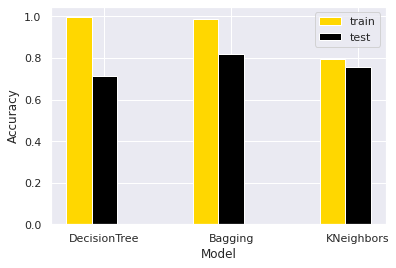

In [13]:
x = np.arange(3)
y1 = df_rev['accuracy_train']
y2 = df_rev['accuracy_test']

width = 0.2
  
plt.bar(x-0.2, y1, width, color='gold') 
plt.bar(x, y2, width, color='black') 
plt.xticks(x, ['DecisionTree', 'Bagging', 'KNeighbors']) 
plt.xlabel("Model") 
plt.ylabel("Accuracy") 
plt.legend(["train", "test"]) 
plt.show() 

*Teniendo a la vista todos los valores de los distintos modelos utilizados, me voy a inclinar por Bagging, ya que existe un "equilibrio" entre datos de training como test. Se descarta DecisionTree, por sospecha de sobreajuste en los datos de training y tambien KNeighbors, debido a que a pesar de varios intentos utilizando distintos estimadores no se logra un accuracy satisfactorio*

# Red Neuronal

In [14]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'home_team_goal_count')
# Encode our target
y = df['home_team_goal_count']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import tensorflow as tf
input_shape = X_train.shape[1]
print('la cantidad de caracteristicas (cols) es:',input_shape)

la cantidad de caracteristicas (cols) es: 9


In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(2, activation='sigmoid')) # Capa de salida, salida 2 (número de clases)

In [17]:
input_shape = X.shape  
model.build(input_shape) 
model.summary()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (380, 300)                3000      
                                                                 
 dense_1 (Dense)             (380, 100)                30100     
                                                                 
 dense_2 (Dense)             (380, 2)                  202       
                                                                 
Total params: 33,302
Trainable params: 33,302
Non-trainable params: 0
_________________________________________________________________


In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                  stratify=y_train)

In [20]:
history = model.fit(X_train, y_train, epochs=30, batch_size=10000,
                    validation_data=(X_val, y_val))

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7269 - accuracy: 0.3860 - val_loss: 0.7199 - val_accuracy: 0.3509
Epoch 2/30
1/1 [==============================] - 0s 40ms/step - loss: 0.7145 - accuracy: 0.4167 - val_loss: 0.7072 - val_accuracy: 0.4211
Epoch 3/30
1/1 [==============================] - 0s 38ms/step - loss: 0.7029 - accuracy: 0.4693 - val_loss: 0.6953 - val_accuracy: 0.5263
Epoch 4/30
1/1 [==============================] - 0s 40ms/step - loss: 0.6919 - accuracy: 0.4956 - val_loss: 0.6840 - val_accuracy: 0.5439
Epoch 5/30
1/1 [==============================] - 0s 42ms/step - loss: 0.6815 - accuracy: 0.5395 - val_loss: 0.6733 - val_accuracy: 0.5789
Epoch 6/30
1/1 [==============================] - 0s 39ms/step - loss: 0.6717 - accuracy: 0.6053 - val_loss: 0.6632 - val_accuracy: 0.6491
Epoch 7/30
1/1 [==============================] - 0s 35ms/step - loss: 0.6624 - accuracy: 0.6623 - val_loss: 0.6536 - val_accuracy: 0.6842
Epoch 8/30
1/1 [=============

In [21]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Score:", score) # Función de pérdida
print("Accuracy:", acc)

3/3 [==============================] - 0s 5ms/step - loss: 0.5738 - accuracy: 0.7158
Score: 0.5737659931182861
Accuracy: 0.7157894968986511


In [22]:
class_names = X.columns
class_names

Index(['home_team_goal_count_half_time', 'home_team_corner_count',
       'home_team_yellow_cards', 'home_team_red_cards', 'home_team_shots',
       'home_team_shots_on_target', 'home_team_shots_off_target',
       'home_team_fouls', 'home_team_possession'],
      dtype='object')

In [25]:
#dato = 7
dato=16
prediction = model.predict(X_test)
classes_x=np.argmax(prediction,axis=1)
print("Predicción:", class_names[classes_x[dato]])
print("Clase Real:", class_names[y_test[dato]])

Predicción: home_team_goal_count_half_time
Clase Real: home_team_goal_count_half_time


In [24]:
y_test

342    1
16     0
282    0
259    1
114    0
      ..
146    0
326    1
80     0
102    1
244    0
Name: home_team_goal_count, Length: 95, dtype: int64

In [30]:
y_test

342    1
16     0
282    0
259    1
114    0
      ..
146    0
326    1
80     0
102    1
244    0
Name: home_team_goal_count, Length: 95, dtype: int64